<h1 align="center"> Лабораторная работа №1</h1>
<h1 align="center"> Градиентный спуск первого порядка </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

<h2 align="center"> Функция Химмельблау </h2>

---

### Выполниили:
- **Бархоткина Анастасия 408226**
- **Лаврик Вадим 408969**
- **Юрков Кирилл 409936**

---

### Преподаватель:
- **Хитров Егор Германович**

---

### 2025 г.

---

### Цель:
Изучить и реализовать метод градиентного спуска для поиска точки минимума тестовой функции. Рассмотреть два варианта метода: с постоянным шагом и адаптивным шагом, зависящим от матрицы Гессе. Дополнительно реализовать ускоренный градиентный метод Нестерова.
    
### Задачи:
1. Реализовать классический градиентный спуск с фиксированным шагом.
2. Реализовать градиентный спуск с адаптивным шагом, рассчитанным на основе матрицы Гессе.
3. Реализовать ускоренный градиентный метод Нестерова.
4. Визуализировать процесс сходимости алгоритмов, построив графики изменения значения функции от итерации.
5. Проанализировать полученные результаты, сравнить скорость сходимости различных методов.

В нашей работе будем исследовать функцию Химмельблау. Она определена как: $ f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 $. Данная функция принадлежит классу гладких функций $ C^{\infty} $ и является многомодальной, то есть имеет несколько локальных минимумов, а именно: 
$$(3.0;2.0) \quad (-2.805;3.131) \quad (-3.779;-3.283) \quad (3.584;-1.848).$$
    
Подробнее рассмотрим метод градиентного спуска, который будет использован в работе. Это итерационный метод оптимизации, в котором мы движемся в направлении антиградиента функции:
    $$x_{k+1} = x_k - h_k \nabla f(x_k),$$
где $h_k$ - шаг матода, $\nabla f(x_k)$ - градиент функции, вычисленный в точке $x_k$.

Градиент функции определяется как вектор, составленный из частных производных по переменным x и y. Для нашей функции:
    $$\frac{\partial f}{\partial x} = 4x(x^2 + y - 11) + 2(x + y^2 - 7)$$
    $$\frac{\partial f}{\partial y} = 2(x^2 + y - 11) + 4y(x + y^2 - 7)$$
    

Импортируем нужные библиотеки.

In [92]:
import numpy as np
import matplotlib.pyplot as plt

Начальной точкой для алгоритма спуска будет точка с координатами $(0.0,\;0.0)$

In [93]:
start = [0, 0]

Далее зададим нашу функцию:

In [94]:
def function_himmelblau(x, y):
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

Также опишем частные производные от этой функции:

In [95]:
def gradient(x, y):
    df_dx = 4 * x * (x ** 2 + y - 11) + 2 * (x + y ** 2 - 7)
    df_dy = 2 * (x ** 2 + y - 11) + 4 * y * (x + y ** 2 - 7)
    return np.array([df_dx, df_dy])

График функции Химмельблау имеет следующий вид:

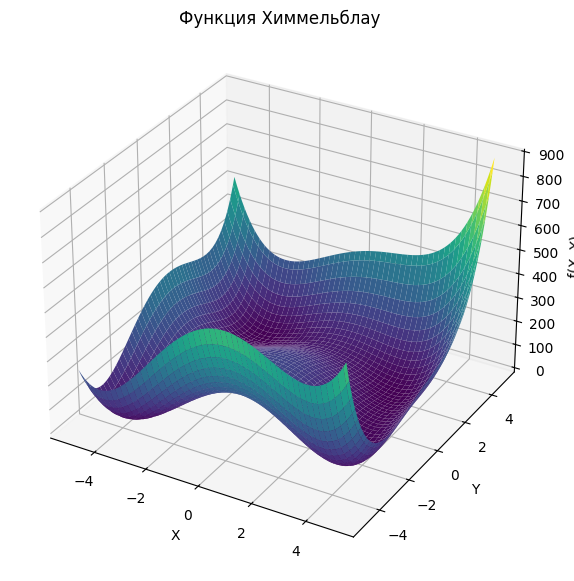

In [96]:
def himmelblau_visualization():
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = function_himmelblau(X, Y)
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X, Y)')
    ax.set_title('Функция Химмельблау')
    plt.show()

himmelblau_visualization()

### Ход работы:
### **Задание 1.** Постоянный шаг

#### Спуск при помощи фиксированного шага

Примем шаг спуска равным $ h = 0.0005 $. Это середина заданного в работе интервала $0 < h < 0.001 $. 

In [97]:
h_fix = 0.0005

Алгоритм спуска с фиксированным шагом будет строить последовательность приближений к минимуму, на каждой итерации вычисляя градиент и обновляя точку по формуле градиентного спуска. Метод должен завершаться, когда точка становится достаточно близка к оптимальному решению. Это проверяется с помощью нормы градиента: 
$$
\|\nabla f(x_k)\|_2 = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 + \left(\frac{\partial f}{\partial y}\right)^2}
$$
Если $ \|\nabla f(x_k)\|_2 $ становится меньше порогового значения $\epsilon = 0.001$, алгоритм завершает работу.

In [98]:
def gradient_descent(start, h):
    point = np.array(start, dtype=float)
    path = [point.copy()]  
    for count_iterations in range(10000):
        grad = gradient(point[0], point[1])
        if np.linalg.norm(grad) < 0.001:
            break
        point -= h * grad
        path.append(point.copy())  
    return point, np.array(path), count_iterations

Теперь с помощью алгоритма найдём точку локального минимума.

In [99]:
min_point_fix, path_fix, count_iterations_fix = gradient_descent(start, h_fix)
print(f"Найденный минимум: {np.round(min_point_fix, 4)}")
print(f"Количество итераций: {count_iterations_fix}")

Найденный минимум: [3. 2.]
Количество итераций: 815


**Найденная точка** равна $ (3.0, 2.0) $. Эта точка **соответствует заранее известным локальным минимумам** функции Химмельблау, благодаря чему делаем вывод, что алгоритм работает корректно.

Количество итераций у фиксированного шага составило 815.

Также построим график высот, для наглядного отображения градиентного спуска с фиксированным шагом.

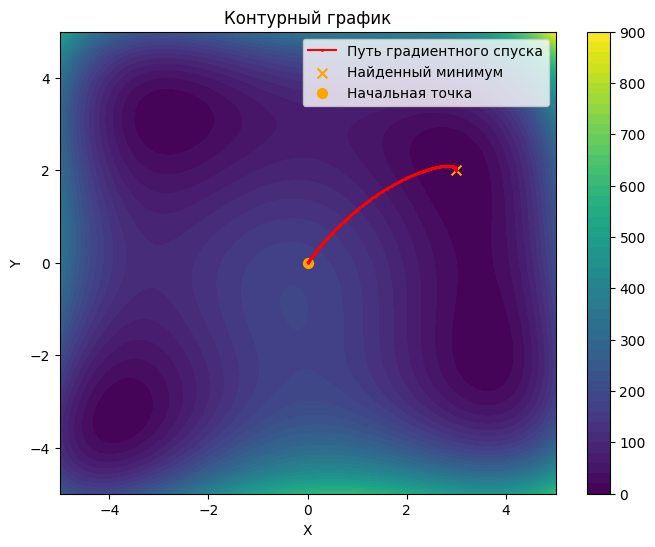

In [100]:
def visualization_of_searching(min_point, path):
    plt.figure(figsize=(8, 6))
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = function_himmelblau(X, Y)
    contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(contour)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Контурный график')
    plt.plot(path[:, 0], path[:, 1], color='red', marker='o', markersize=1, label='Путь градиентного спуска')
    plt.scatter(min_point[0], min_point[1], color='orange', marker='x', s=50, label='Найденный минимум')
    plt.scatter(start[0], start[1], color='orange', marker='o', s=50, label='Начальная точка')
    plt.legend()
    plt.show()

visualization_of_searching(min_point_fix, path_fix)

### **Вывод по заданию:**
Метод градиентного спуска с фиксированным шагом показал стабильную сходимость. Однако при неудачном выборе шага метод мог демонстрировать более медленную сходимость или расходиться. Для функции Химмельблау в плоских областях метод сходился медленно, так как градиенты малы, а шаг остается фиксированным.

### **Задание 2.** Шаг, зависящий от матрицы Гессе

#### Шаг при помощи матрицы Гессе

Шаг будем задавать по формуле:
$$ h_k = \frac{1}{\|H(x_k)\|_2}, $$
где $H(x_k)$ - матрица Гессе нашей функции в точке $x_k$, а $\|H(x_k)\|_2$ - спектральная норма матрицы, равная наибольшему по модулю собственному значению.

Матрица Гессе содержит вторые частные производные и задаётся следующим образом:
$$
H(x,y) = \begin{bmatrix} 
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\ 
\frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2} 
\end{bmatrix}
$$
Для функции Химмельблау:
$$
\begin{align*}
\frac{\partial^2 f}{\partial x^2} &= 12x^2 + 4y - 42 \\
\frac{\partial^2 f}{\partial y^2} &= 12y^2 + 4x - 26 \\
\frac{\partial^2 f}{\partial x \partial y} &= \frac{\partial^2 f}{\partial y \partial x} = 4(x + y)
\end{align*}
$$

In [101]:
def hessian(x, y):
    d2f_dx2 = 12 * x ** 2 + 4 * y - 42
    d2f_dy2 = 4 * x + 12 * y ** 2 - 26
    d2f_dxdy = 4 * (x + y)
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

Реализуем алгоритм градиентного спуска, в котором шаг будет определяться с учётом заданной раннее матрицы Гессе. Этот метод позволяет адаптировать шаг к локальной кривизне функции, ускоряя сходимость.


На вход алгоритму подаётся начальная точка ${x}_0 = (x_0, y_0)$. Далее создаем массив, который хранит текущую точку ${x}_k$, и список для сохранения всех промужеточных точек на траектории спуска. 

В текущей точке ${x}_k$ будем вычилсять градиент функции, который указывает направление наискорейшего роста функции, и движение против него ведёт к минимуму. Затем вычислим матрицу Гессе и её спектральную норму. Если норма равна нулю, алгоритм останавливается, чтобы избежать деления на 0. 

Новая точка вычисляется по заданной ранее формуле градиентного спуска. 

#### Критерий остановки
Если норма градиента стала меньше 0.001, алгоритм завершает работу:
$$ \| \nabla f(x_k) \| < 0.001 $$
Это означает, что алгоритм достаточно близко подошел к оптимальному решению.

In [102]:
def gradient_descent_variable_step(start):
    point = np.array(start, dtype=float)
    path = [point.copy()]
    for count_iterations in range(10000):
        grad = gradient(point[0], point[1])
        hess = hessian(point[0], point[1])
        hess_norm = np.linalg.norm(hess, 2) 
        if hess_norm == 0:
            break  
        h = 1 / hess_norm  
        if np.linalg.norm(grad) < 0.001:
            break
        point -= h * grad
        path.append(point.copy())
    return point, np.array(path), count_iterations

С помощью алгоритма найдём локальную точку.

In [103]:
min_point_gesse, path_gesse, count_iterations_gesse = gradient_descent_variable_step(start)
print(f"Найденный минимум: {np.round(min_point_gesse, 4)}")
print(f"Количество итераций: {count_iterations_gesse}")

Найденный минимум: [3. 2.]
Количество итераций: 29


**Найденная точка** равна $ (3.0, 2.0) $. Эта точка также **соответствует заранее известным локальным минимумам** функции Химмельблау, благодаря чему делаем вывод, что алгоритм с шагом, зависящим от матрицы Гессе, работает корректно.

Количество итераций у алгоритма подбора шага при помощи матрицы Гессе составило 29.

Также построим график высот, для наглядного отображения градиентного спуска с шагом, зависящим от матрицы Гессе.

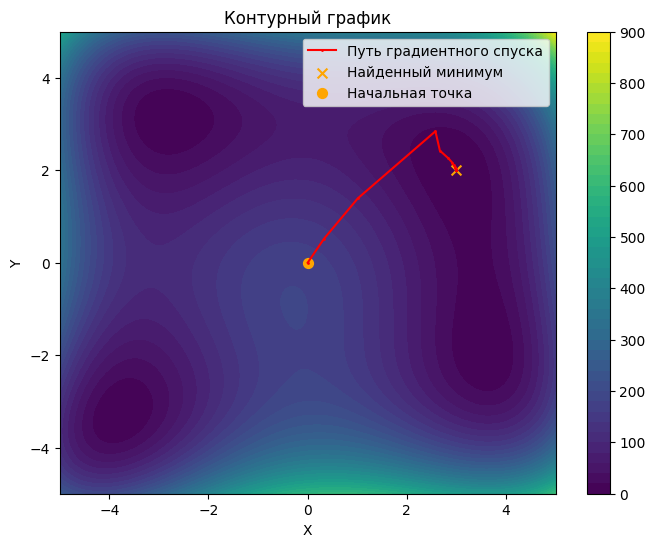

In [104]:
visualization_of_searching(min_point_gesse, path_gesse)

### **Вывод по заданию:**
Метод работает более эффективно за счёт адаптации шага к рельефу функции. В плоских областях шаг увеличивался, ускоряя сходимость.В крутых областях шаг уменьшался, стабилизируя спуск. Таким образом, данный подход демонстрирует более более стабильную и быструю сходимость по сравнению с фиксированным шагом.

### **Задание 3.** Ускоренный шаг.

#### Ускоренный шаг алгоритма Нестерова

В методе Нестерова используются два ключевых параметра, которые влияют на скорость и устойчивость сходимости:
- Моментум  

Этот параметр отвечает за накопление прошлых градиентов и определяет, насколько текущий шаг зависит от предыдущих. Чаще всего в литературе встречается значение моментума 0.9. Бдуем использовать его, поскольку при слишком малых значениях ($ \approx0.8 $) движение может быть медленным, и метода не даст нужного ускорения, а при слишком больших ($>0.95$) - есть вероятность того, что метод пропустит нужную точку минимума, а также возможны осцилляции, которые могут понизить точность.

- Шаг спуска

Его возьмем как в первом задании.


In [105]:
h = 0.0005  
momentum = 0.9

В данном алгоритме дополнительно создадим массив velocity, который будет хранить накопленный момент градиента (изначально он равен нулю).

Перед вычислением градиента выполняется предварительное смещение точки в направлении предыдущего накопленного градиента:
$$
y_k = x_k + \beta v_k,
$$
где $\beta$ - моментум.  
Это отличие метода Нестерова от обычного градиентного спуска: градиент вычисляется не в текущей точке, а в предсказанной точке $y_k$.

После вычисления градиента обновляется скорость изменения точки, учитывая прошлое направление:
$$
v_{k+1} = \beta v_k - h \nabla f(y_k)
$$
Обновлённая точка получается сложением предыдущей точки с новым значением скорости:
$$
x_{k+1} = x_k + v_{k+1}
$$
Критерий остановки аналогичен предыдущему заданию.

In [106]:
def nesterov_gradient_descent(start, h, momentum):
    point = np.array(start, dtype=float)
    velocity = np.zeros_like(point)
    path = [point.copy()]
    for count_iterations in range(10000):
        lookahead_point = point + momentum * velocity
        grad = gradient(lookahead_point[0], lookahead_point[1])
        if np.linalg.norm(grad) < 0.001:
            break
        velocity = momentum * velocity - h * grad
        point += velocity
        path.append(point.copy())
    return point, np.array(path), count_iterations

С помощью ускоренного спуска найдём локальную точку.

In [107]:
min_point_nesterov, path_nesterov, count_iterations_nesterov = nesterov_gradient_descent(start, h, momentum)
print(f"Найденный минимум: {np.round(min_point_nesterov, 4)}")
print(f"Количество итераций: {count_iterations_nesterov}")

Найденный минимум: [3. 2.]
Количество итераций: 167


**Найденная точка** равна $ (3.0, 2.0) $. Эта точка также **соответствует заранее известным локальным минимумам** функции Химмельблау, благодаря чему делаем вывод, что алгоритм с ускоренным шагом Нестерова работает корректно.

Количество итераций у ускоренного шага Нестерова составило 167.

Также построим график высот, для наглядного отображения градиентного спуска с ускоренным шагом.

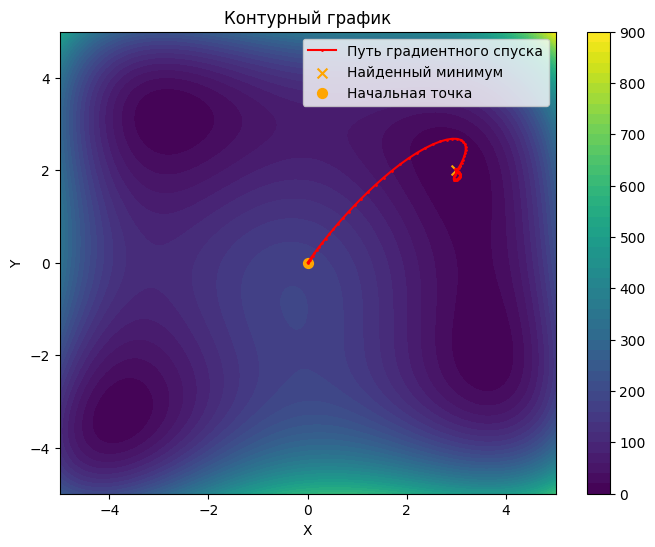

In [108]:
visualization_of_searching(min_point_nesterov, path_nesterov)

### **Вывод по заданию:**
Предсказание градиента помогло избежать колебаний на сложных участках. Метод ускорил сходимость, особенно в областях с малыми градиентами.

### Вывод ###

В ходе выполнения лабораторной работы нами были рассмотрены три метода оптимизации первого порядка на примере функции Химмельблау: градиентный спуск с фиксированным шагом, градиентный спуск с переменным шагом, ускоренный градиентный метод Нестерова.

Мы выявили, что наименее эффективным оказался метод с фиксированным шагом, поскольку он демонстрировал более медленную сходимость (количество итераций цикла 815). Несмотря на простоту реализации и вычислительную эффективность, он требует подбора подходящего шага, при плохом выборе которого точка минимума может быть не найдена.

Далее мы рассмотрели метод градиентного спуска с переменным шагом, он показал лучшую сходимость (количество итерациий 29) и позволил избежать необходимости подбора шага вручную. Однако метод требует вычисления матрицы Гессе, то есть подсчёта вторых производных, что в некоторых случаях может быть крайне трудозатратно, а также подсчёт её нормы, что увеличивает вычислительную сложность.

Эффективным для функции Химмельблау методом стал ускоренный градиентный метод Нестерова. Он продемонстрировал быструю сходимость за счёт предсказания точки перед вычислением градиента (количество итераций 167),  и сгладил траекторию спуска, уменьшая колебания по сравнению с обычным градиентным методом. Более того, метод требует меньшей вычислительной сложности, чем фиксированный шаг, однако, в нашем случае, меньше, чем у сходмости метода по матрице Гессе. Это обусловлено тем, что вычисление матрицы Гессе у функции Химмельблау занимает крайне мало времени.


